# Visualización I - Series de tiempo

## Introducción

Análisis de las ventas a lo largo del tiempo

En clases anteriores utilizamos gráficos como el `histograma` y el `boxplot` para representar la distribución de variables numéricas y exponer las medidas de posición central (media, mediana y rango intercuartílico) y las medidas de dispersión o variabilidad (varianza, desviación estándar y rango).
Estos gráficos nos permiten además visualizar rápidamente valores atípicos (outliers), así como identificar tendencias y patrones.
<br>
Sin embargo, al momento de elaborar un reporte de Business Intelligence (BI), necesitamos otro tipo de visualizaciones que nos permitan destacar información clave, captar la atención de la audiencia y facilitar la comprensión de los resultados.

# Ejemplo introductorio

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creamos un dataset con los valores de ventas acumulados para cada uno de los
# meses del año de un determinado producto (2024)
# Lista con los meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul',
         'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Lista con las ventas (Pesos)
ventas = [100, 120, 130, 150, 180, 170, 200, 210, 250, 270, 300, 320]

# Creamos un DataFrame de Pandas para organizar los datos
df = pd.DataFrame({'Mes': meses, 'Ventas': ventas})

## Breve EDA para familiarizarnos con el Dataframe
En nuestro dataset identificamos 2 variables:
* Ventas: variable numérica
* Meses: variable categórica

A modo de repaso, apliquemos algunos métodos y gráficos de EDA a la variable numérica "Ventas"

In [3]:
# Usar los métodos vistos para EDA:
df.info()
df.describe()
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mes     12 non-null     object
 1   Ventas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


,Mes,Ventas
8,Sep,250


<Axes: xlabel='Ventas', ylabel='Count'>

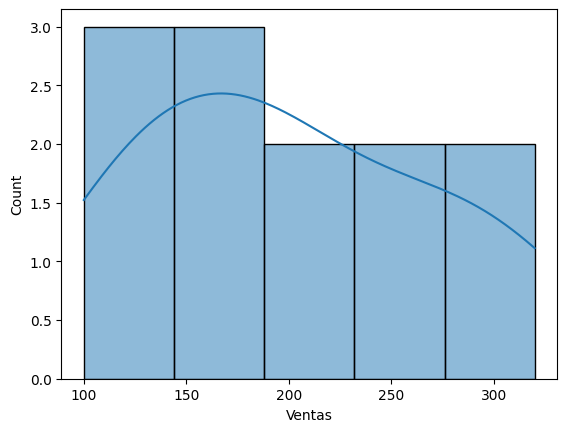

In [4]:
# Usar los gráficos vistos para EDA:
# Histograma: para analizar la distribución
sns.histplot(df["Ventas"], kde=True)

<Axes: xlabel='Ventas'>

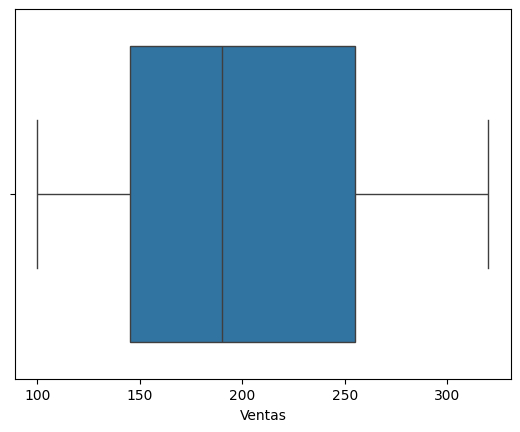

In [5]:
# Boxplot: para analizar medidas de posición central y de dispersión
sns.boxplot(data=df, x="Ventas")

<Axes: xlabel='Mes', ylabel='Ventas'>

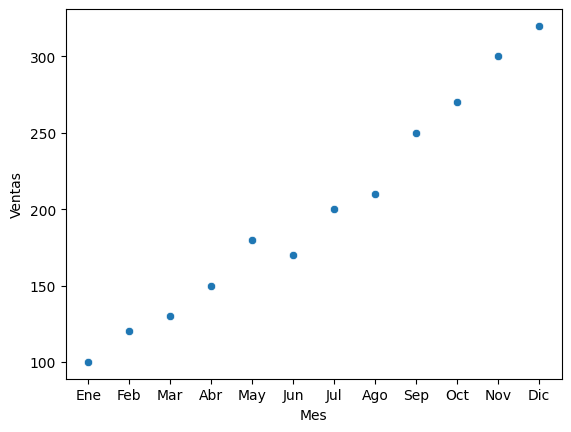

In [6]:
# El scatterplot permite observar la relación entre los meses y las ventas.
sns.scatterplot(data=df, x="Mes", y="Ventas")

# Unir los dots con líneas, se aprecia la tendencia?

### Conclusiones:
Escribir brevemente lo observado...

## Visualizar la serie de tiempo
Nos interesa ahora analizar cómo han evolucionado las ventas a lo largo del tiempo, en este caso, a lo largo de los 12 meses del año.
<BR>
Este análisis es necesario para que el cliente pueda tomar decisiones estratégicas sobre los productos y las campañas de marketing de la marca.
<BR>
Para ello vamos a generar un gráfico de lineas.

### Usando Seaborn

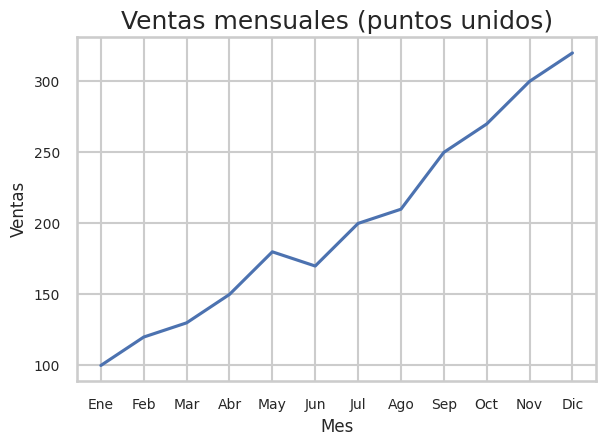

In [23]:
# Estilo
# Usamoe set_theme para ajustar los estilos del lineplo
# Cuidado: se anula si pasamos 'color' como argumento dentro de lineplot
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="talk",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="deep"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Línea que une los puntos
sns.lineplot(data=df, x="Mes", y="Ventas")

# Ticks (valores de eje)
plt.tick_params(axis='both', labelsize=10)

# Etiquetas y título
plt.title('Ventas mensuales (puntos unidos)')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.tight_layout()
plt.show()


### Usando Seaborn personalizado

Ahora vamos a usar algunos parámetros de `sns.lineplot()` para hacerlo más claro y atractivo:

* `color` define el color de la línea (puede ser nombre, código RGB o hexadecimal).
* `linewidth` cambia el grosor.
* `linestyle` define el tipo de trazo (continuo, punteado, etc.).
* `marker` agrega un símbolo en cada punto de datos (o círculo, s cuadrado, D diamante)


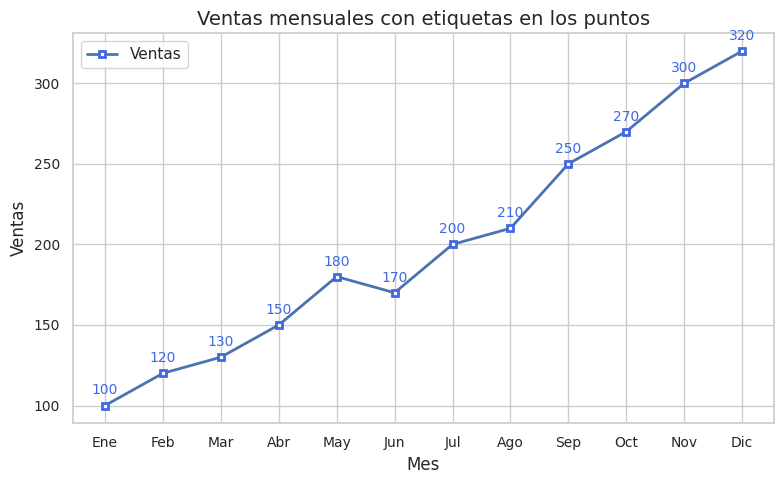

In [27]:
# Estilo
# Usamoe set_theme para ajustar los estilos del lineplo
# Cuidado: se anula si pasamos 'color' como argumento dentro de lineplot
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="deep"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Definir el tamaño del lienzo del gráfico
plt.figure(figsize=(8, 5))

# Línea con puntos personalizados
# aqui encuentran más argumentos para customizar el lineplot
sns.lineplot(
    x='Mes',
    y='Ventas',
    data=df,
    linewidth=2,
    linestyle='-',          # estilo: '-', '--', '-.'
    marker='s',         # 's' = square (cuadrado) / D diamante
    markersize=5,       # tamaño del marcador
    markerfacecolor='white',  # color interior del marcador
    markeredgecolor='royalblue',  # color del borde
    markeredgewidth=2,   # grosor del borde
    label="Ventas"
)

# Agregar etiquetas de texto sobre cada marcador
for i, row in df.iterrows():
    plt.text(
        row['Mes'],                 # posición en eje X
        row['Ventas'] + 5,          # posición en eje Y (un poco arriba del punto)
        f"{row['Ventas']}",         # texto a mostrar
        ha='center',                # alineación horizontal centrada
        va='bottom',                # alineación vertical (debajo o encima del punto)
        fontsize=10,
        color='royalblue'
    )

# Ticks (valores de eje)
plt.tick_params(axis='both', labelsize=10)

# Ajustes de título y ejes
plt.title('Ventas mensuales con etiquetas en los puntos', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()
plt.show()

### Proyección de ventas

In [32]:
# Simulamos un incremento de 10% para las ventas proyectadas del próximo año
df["Ventas_proyectadas"] = [v * 1.1 for v in df["Ventas"]]
df

,Mes,Ventas,Ventas_proyectadas
0,Ene,100,110.0
1,Feb,120,132.0
2,Mar,130,143.0
3,Abr,150,165.0
4,May,180,198.0
5,Jun,170,187.0
6,Jul,200,220.0
7,Ago,210,231.0
8,Sep,250,275.0
9,Oct,270,297.0


In [33]:
# Unimos las ventas proyectadas para graficar con Seaborn
df_melted = df.melt(
    id_vars='Mes',                     # columna que permanece fija
    value_vars=['Ventas', 'Ventas_proyectadas'],  # columnas a combinar
    var_name='Tipo',                   # nueva columna con el nombre de la serie
    value_name='Valor'                # nueva columna con los valores
)

print(df_melted.head(24))
# Notar que ahora tenemos 24 registros (antes solo 12), el campo Tipo toma dos valores "Ventas" y "Ventas_proyectadas".
# En cuanto a la columna "Valor", adquiere los datos que antes estaban en "Ventas"

    Mes                Tipo  Valor
0   Ene              Ventas  100.0
1   Feb              Ventas  120.0
2   Mar              Ventas  130.0
3   Abr              Ventas  150.0
4   May              Ventas  180.0
5   Jun              Ventas  170.0
6   Jul              Ventas  200.0
7   Ago              Ventas  210.0
8   Sep              Ventas  250.0
9   Oct              Ventas  270.0
10  Nov              Ventas  300.0
11  Dic              Ventas  320.0
12  Ene  Ventas_proyectadas  110.0
13  Feb  Ventas_proyectadas  132.0
14  Mar  Ventas_proyectadas  143.0
15  Abr  Ventas_proyectadas  165.0
16  May  Ventas_proyectadas  198.0
17  Jun  Ventas_proyectadas  187.0
18  Jul  Ventas_proyectadas  220.0
19  Ago  Ventas_proyectadas  231.0
20  Sep  Ventas_proyectadas  275.0
21  Oct  Ventas_proyectadas  297.0
22  Nov  Ventas_proyectadas  330.0
23  Dic  Ventas_proyectadas  352.0


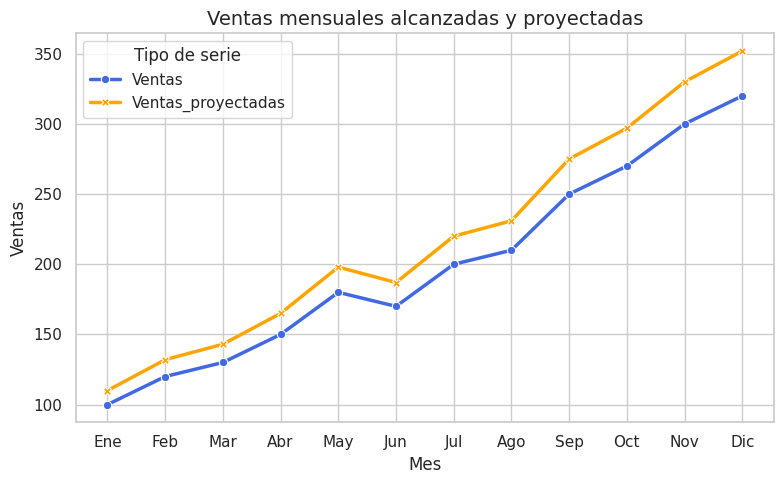

In [34]:
# Estilo general
# No aplicamos estilo general, porque especificamos un color para cada linea del gráfico

# Definimos el tamaño del lienzo
plt.figure(figsize=(8, 5))

# Línea con puntos personalizados, una por tipo de venta
sns.lineplot(
    data=df_melted,
    x='Mes', y='Valor',
    hue='Tipo',            # cada tipo tendrá un color diferente
    style='Tipo',          # también cambia el estilo de línea
    markers=True,          # activa marcadores por categoría
    dashes=False,          # usa líneas continuas en lugar de guiones
    linewidth=2.5,
    palette={'Ventas': 'royalblue', 'Ventas_proyectadas': 'orange'}
)

# Aquí no se recomienda poner etiquetas porque satura el gráfico
# for i, row in df_melted.iterrows():
#     plt.text(
#         row['Mes'],                 # posición en eje X
#         row['Valor'] + 5,          # posición en eje Y (un poco arriba del punto)
#         f"{row['Valor']:.1f}",         # texto a mostrar
#         ha='center',                # alineación horizontal centrada
#         va='bottom',                # alineación vertical (debajo o encima del punto)
#         fontsize=10,
#         color='royalblue'
#     )

# Por último agregamos los datos de Título y Ejes
plt.title('Ventas mensuales alcanzadas y proyectadas', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend(title='Tipo de serie', loc='upper left')
plt.tight_layout()
plt.show()

### Usando Plotly (solo a modo introductorio)
Lo vemos en detalle en clase 13

In [35]:
import plotly.graph_objects as go

# Figura
fig = go.Figure()

# Scatter con línea
fig.add_trace(go.Scatter(
    x=df['Mes'],
    y=df['Ventas'],
    mode='lines+markers',
    line=dict(color='royalblue', width=2),
    marker=dict(size=8, symbol='circle'),
    name='Ventas'
))

fig.update_layout(
    title='Ventas mensuales (puntos unidos)',
    title_x=0.5,
    xaxis_title='Mes',
    yaxis_title='Ventas',
    template='plotly_white'
)

fig.show()


# Ejemplo con Dataset Superstore

In [58]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Usar el método read_csv de Pandas (pd) que recibe como argumento el archivo csv y retorna un dataframe
import os
os.chdir('/content/drive/MyDrive/datasets')
df = pd.read_csv("superstore.csv", encoding="latin1")

# Nota: para este Dataset en particular, hay que especificar el "encoding", sino generar error.

In [39]:
# Tomemos algunas muestras
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [42]:
# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [43]:
# Limpieza básica y conversión de tipo de datos
df = df.dropna(subset=["order_date", "sales", "profit"])
# Convertimos el campo fecha de string a datetime
df["order_date"] = pd.to_datetime(df["order_date"])

In [44]:
# Transformación: generar las columnas año y mes a partir del campo date
df["year"]=df["order_date"].dt.year
df["month"]=df["order_date"].dt.month

In [48]:
# Si listamos los primeros 10 registros ordenados por "year" y luego por "month",
# Veremos que hay múltiples ventas para el mismo período
df.head(5)[["product_name", "sales", "quantity", "profit", "year", "month"]].sort_values(by=["year", "month"])

# Es por ello que debemos preparar los datos antes de generar el lineplot

,product_name,sales,quantity,profit,year,month
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,-383.0310,2015,10
4,Eldon Fold 'N Roll Cart System,22.3680,2,2.5164,2015,10
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,6.8714,2016,6
0,Bush Somerset Collection Bookcase,261.9600,2,41.9136,2016,11
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,219.5820,2016,11


In [52]:
# Agrupación/agregación:
# Queremos representar la suma de ventas y ganancias, agrupadas por año y por mes:
df_sales = df.groupby(["year", "month"]).agg({"sales": "sum", "profit": "sum"}).reset_index()

# Opcionalmente se puede filtrar por un año específico
# df_sales = df_sales.query("year == 2017")

In [54]:
# Este nuevo dataset, solo tiene ventas y profits acumulados por períodos únicos
df_sales.head()

,year,month,sales,profit
0,2014,1,14236.895,2450.1907
1,2014,2,4519.892,862.3084
2,2014,3,55691.009,498.7299
3,2014,4,28295.345,3488.8352
4,2014,5,23648.287,2738.7096


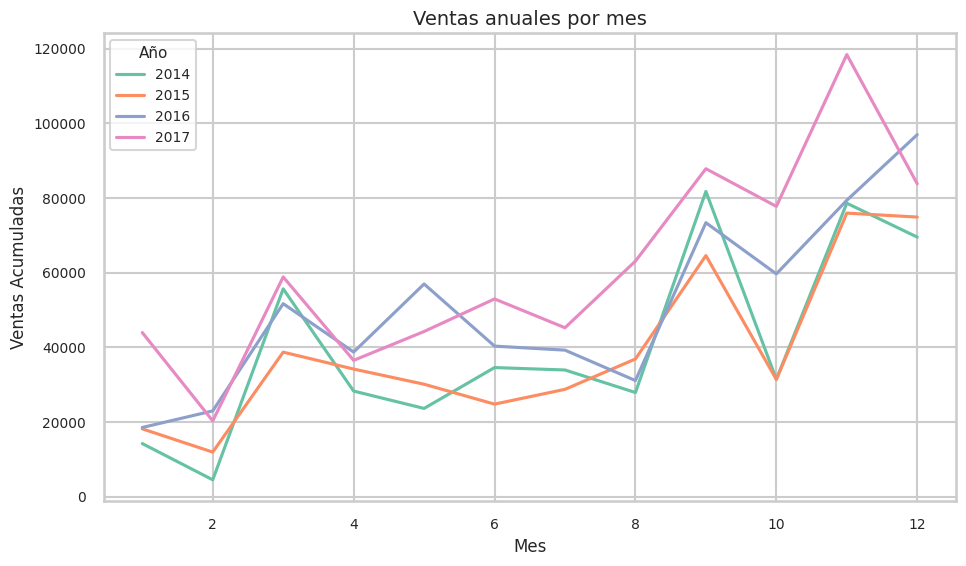

In [67]:
# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_theme(style="whitegrid", context="talk")
# Como nuestro lineplot genera una línea para cada año (2014, 2015, 2016, 2017)
# Debemos generar una paleta de 4 colores, uno para cada año
# Elegimos la Paleta "Set2" y que elija 4 colores
custom_palette = sns.color_palette("Set2", n_colors=4) # Aqui pueden cambiar a "Set1", "Set2", "Set3"

# Definimos el tamaño del lienzo
plt.figure(figsize=(10,6))

# Graficamos
sns.lineplot(data=df_sales, x="month", y="sales", hue="year", palette=custom_palette)

# Ticks (valores de eje)
plt.tick_params(axis='both', labelsize=10)

# Ajustes de título y ejes
plt.title('Ventas anuales por mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Acumuladas', fontsize=12)
plt.legend(title='Año', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

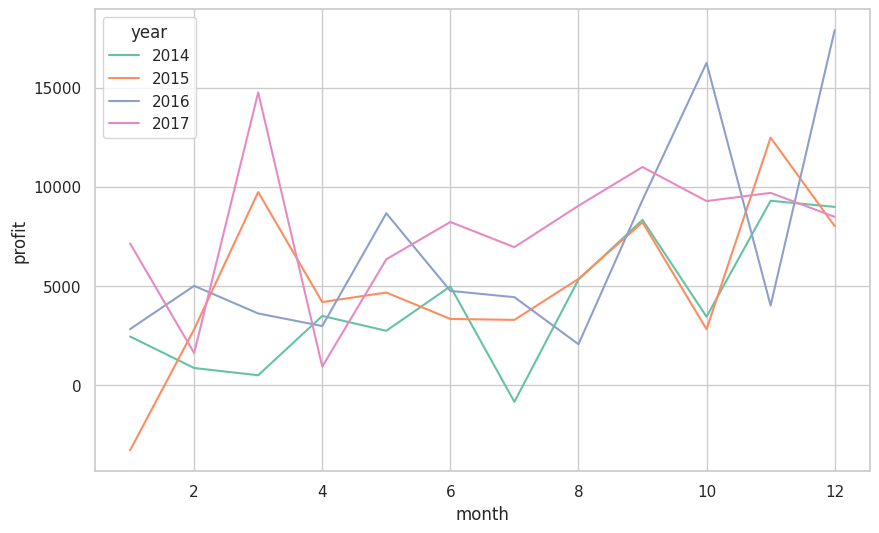

In [69]:
# Y otro que muestre la evolución de las ganancias en el año
plt.figure(figsize=(10,6))
custom_palette = sns.color_palette("Set2", n_colors=4) # Aqui pueden cambiar a "Set1", "Set2", "Set3"
sns.lineplot(data=df_sales, x="month", y="profit", hue="year", palette="Set2")
plt.show()

### Introducción a gráficos de barra y barra apilados
Ya que las ventas y las ganancias se encuentran en las mismas unidads, que interesante sería poder graficar ambos en un mismo plot, de manera de identificar rápidamente la proporción de las ganancias sobre las ventas.
<BR>
Veamos primero una introducción a Barplot tomando como referencia el la actividad para esta clase, y luego veamos como se puede aplicar al caso que nos interesa.
<BR>

**Recuerden**: Vamos a cubrir en detalles este tema en clase 13, por ahora solo veamos el resultado final:

In [70]:
# Datos de ventas por producto
productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D']
# Lista de los nombres de los
productosventas = [300, 250, 400, 350] # Lista de las unidades vendidas de cada producto en la campaña.
# Generamos el Dataframe
df1 = pd.DataFrame({'Producto': productos, 'Ventas': productosventas})

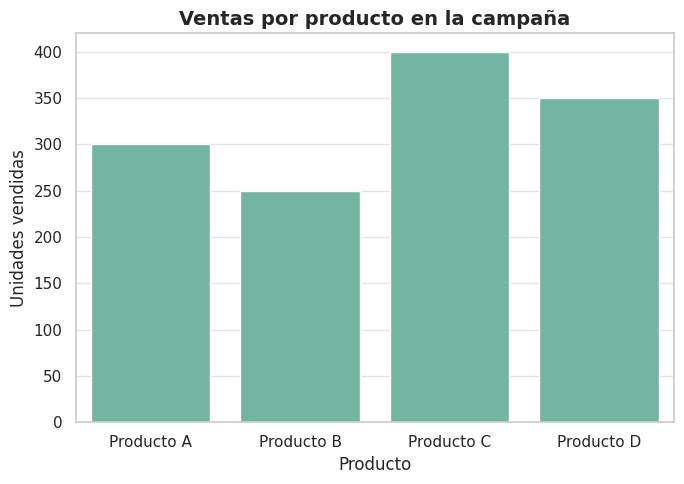

In [71]:
# Estilo y paleta
sns.set_theme(style="whitegrid", palette="Set2")

# Crear el barplot
plt.figure(figsize=(7,5))
sns.barplot(data=df1, x='Producto', y='Ventas')

# Personalización del gráfico
plt.title('Ventas por producto en la campaña', fontsize=14, weight='bold')
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Unidades vendidas', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

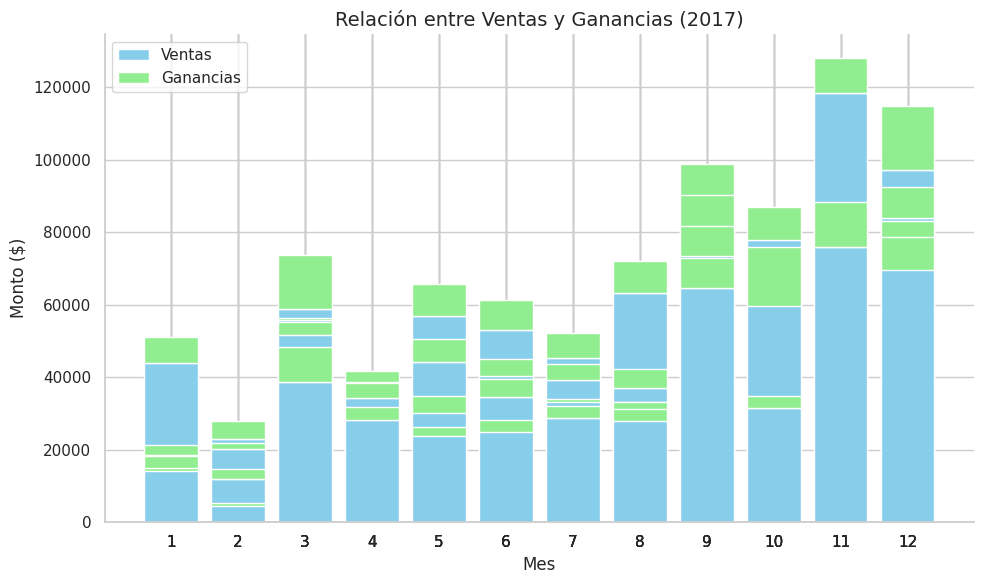

In [72]:
# Generamos un gráfico de barras apilado, de manera de mostrar comparativamente
# las ganancias sobre las ventas
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos el orden de los meses (opcional)
df_sales = df_sales.sort_values("month")

# Creamos el gráfico apilado
plt.figure(figsize=(10,6))
plt.bar(df_sales["month"], df_sales["sales"], label="Ventas", color="skyblue")
plt.bar(df_sales["month"], df_sales["profit"], bottom=df_sales["sales"], label="Ganancias", color="lightgreen")

# Etiquetas y estilo
plt.title("Relación entre Ventas y Ganancias (2017)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Monto ($)")
plt.legend()
plt.xticks(df_sales["month"])
sns.despine()
plt.tight_layout()
plt.show()
